In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## 1. Préparation des données
Chargement du dataset IMDB.

In [ ]:
from google.colab import files
uploaded = files.upload ()
reviews = pd.read_csv('IMDB Dataset.csv', engine='python', error_bad_lines=False)
reviews.head()

Saving IMDB Dataset.csv to IMDB Dataset (1).csv


<ipython-input-4-946a234a67b8>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reviews = pd.read_csv('IMDB Dataset.csv', engine='python', error_bad_lines=False)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


La a colonne de sentiment doit être convertie en valeurs numériques telles que le sentiment "positif" est considéré comme 1 et le sentiment "négatif" comme 0. Nous pouvons y parvenir facilement en modifiant la colonne DataFrame de pandas à l'aide de <b>np.where() </b>:

In [ ]:
reviews['sentiment'] = np.where(reviews['sentiment'] == 'positive', 1, 0)

Convertir les  <b> reviews </b> et les <b> sentiments </b> en tableaux NumPy car les méthodes de prétraitement favorisent des tableaux au lieu des séries pandas

In [ ]:
sentences = reviews['review'].to_numpy()
labels = reviews['sentiment'].to_numpy()

 80 % des données pour l'entrainement et 20 % des données pour le test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2)
print("Training Data Input Shape: ", x_train.shape)
print("Training Data Output Shape: ", y_train.shape)
print("Testing Data Input Shape: ", x_test.shape)
print("Testing Data Output Shape: ", y_test.shape)

Training Data Input Shape:  (40000,)
Training Data Output Shape:  (40000,)
Testing Data Input Shape:  (10000,)
Testing Data Output Shape:  (10000,)


<b> tokenisation </b>

Conversion des données textuelles (reviews) en valeurs numériques


On prend lez 10 000 premiers mots en fonction de leur occurences dans le dataset d'apprentissage

Nous avons spécifié oov_tok comme "< OOV >" qui remplacera tout mot inconnu dans le corpus de texte.


In [ ]:
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

Definition des hyperparamètres pour Tokenizer()
Ensuite les adapter aux données d'entraînement à l'aide de <b>fit_on_texts() </b> :

In [ ]:
tokenizer.fit_on_texts(x_train)
print("Nombre de phrases (documents): ", tokenizer.document_count)
print("Nombre de mots (tokens): ", tokenizer.num_words)

Nombre de phrases (documents):  40000
Nombre de mots (tokens):  10000


Visualisation de l'indice de chaque mot du dictionnaire.

In [ ]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'with': 16,
 'for': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'be': 27,
 'one': 28,
 'he': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'so': 35,
 'who': 36,
 'from': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'out': 43,
 'if': 44,
 "it's": 45,
 'has': 46,
 'there': 47,
 'some': 48,
 'what': 49,
 'good': 50,
 'when': 51,
 'more': 52,
 'very': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'even': 57,
 'my': 58,
 'she': 59,
 'would': 60,
 'which': 61,
 'only': 62,
 'story': 63,
 'see': 64,
 'really': 65,
 'their': 66,
 'can': 67,
 'had': 68,
 'me': 69,
 'well': 70,
 'were': 71,
 'we': 72,
 'than': 73,
 'much': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'bad': 78,
 'great': 79,
 'other': 80,
 'will': 81,
 'also': 82,
 '

Visualisation du nombre d'occurence de chaque mot dans le dictionnaire global

In [ ]:
tokenizer.word_counts

OrderedDict([('the', 532322),
             ('first', 13883),
             ('five', 1358),
             ('minutes', 4720),
             ('of', 230774),
             ('this', 120569),
             ('movie', 69473),
             ('showed', 738),
             ('potential', 898),
             ('after', 11919),
             ('that', 109253),
             ('it', 125192),
             ('went', 2380),
             ('straight', 1342),
             ('from', 32381),
             ('something', 8041),
             ('possibly', 1095),
             ('decent', 1803),
             ('to', 214002),
             ('some', 24766),
             ('sort', 2332),
             ('illegitimate', 17),
             ('comedy', 5142),
             ('best', 10087),
             ('part', 6255),
             ('is', 168507),
             ('i', 123742),
             ("couldn't", 2391),
             ('stop', 1858),
             ('thinking', 1847),
             ('supertroopers', 3),
             ('thanks', 733),
             

Le nombre de phrases contenant un mot

In [ ]:
tokenizer.word_docs

defaultdict(int,
            {'at': 20473,
             '5': 1850,
             'off': 7329,
             'if': 17224,
             'five': 1182,
             'in': 35193,
             'just': 16817,
             'make': 9762,
             'of': 37911,
             'straight': 1194,
             'so': 18570,
             'thing': 5986,
             'something': 6481,
             'minutes': 3813,
             'after': 9037,
             'point': 4079,
             'many': 8095,
             'most': 10325,
             'watching': 6074,
             'first': 9995,
             'there': 15468,
             'potential': 830,
             'stopped': 325,
             'wonder': 1556,
             'to': 37592,
             'would': 12744,
             'went': 2181,
             '22': 104,
             'one': 22627,
             'decent': 1599,
             'crew': 835,
             'million': 535,
             'able': 1877,
             'scenes': 6275,
             'cast': 4981,
            

Apres avoir tokenisé l'ensemble du corpus de texte

On passe a la conversion de  chaque review en une séquence numérique à l'aide du tokenizer

In [ ]:
train_sequences = tokenizer.texts_to_sequences(x_train)
print("Le premier review du dataset d'entrainement en indices : ", train_sequences[0])

Le premier review du dataset d'entrainement en indices :  [2, 88, 715, 228, 5, 12, 18, 1218, 1041, 101, 13, 10, 423, 721, 37, 138, 879, 550, 6, 48, 434, 5, 1, 209, 2, 116, 173, 7, 13, 11, 418, 531, 535, 5, 1, 1226, 6, 5108, 1, 11, 60, 376, 147, 12, 18, 17, 2, 2018, 194, 5, 2869, 86, 22, 6, 94, 4, 18, 47, 24, 35, 106, 136, 9, 12, 18, 13, 166, 28, 40, 531, 3, 576, 44, 2, 446, 176, 3, 926, 40, 2319, 2938, 31, 48, 221, 2, 148, 13, 1, 69, 89, 42, 12, 18, 7, 13, 10, 1, 5428, 1447, 9, 2, 868, 1050, 3, 62, 2123, 42, 302, 460, 1447, 6, 94, 1, 6, 1, 4733, 17, 110, 480, 6, 1472, 13, 28, 124]


Chaque review des données d'entrainement est convert en une sequence numérique qui peut être introduite au modèle mathèmatique à des fins d'entrainement   le texte de chaque review a une longueure en mots différentes et produira une longueur de séquence numérique différente de celle des autres révisions.

Limitation des longueurs de séquence à une valeur constante pour chaque review. Nous spécifierons une longueur de séquence de 200 mots pour chaque review

Les séquences numériques ayant des longueurs supérieures à 200 seront tronquées à la fin

celles ayant des longueurs inférieures à 200 seront complétées par des zéros à la fin.

Spécification du padding de séquence pour les séquences numériques des reviews.


In [ ]:
sequence_length = 200
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

Prétraitement par les mêmes étapes pour les données de test

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

Avec la tokenisation, la conversion de séquence et le padding, nous en avons terminé avec le prétraitement des reviews.

Passons maintenant à la construction du modèle LSTM réel pour l'analyse des sentiments

## 2. Analyse des sentiments à l'aide de LSTM


In [ ]:
model = Sequential()

Ajout d'une couche d'embedding qui convertira chaque mot en un vecteur dense de dimensions d'emdedding spécifiées dans les hyperparamètres de la couche

In [ ]:
embedding_dim = 16
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))

Spécifier la couche Bidirectional() et la couche LSTM avec une taille d'unité spécifiée dans la couche LSTM

L'un des avantages de l'utilisation de LSTM bidirectionnel est qu'il se souvient de la sortie du passé vers le futur ainsi que du futur vers le passé. Cette technique peut donc aboutir à des modèles plus robustes pour l'analyse des séries chronologiques

In [ ]:
lstm_out = 32
model.add(Bidirectional(LSTM(lstm_out)))

Une couche entièrement connectée ayant 10 unités et une activation "relu" et nous ajouterons une couche de sortie ayant seulement 1 unité et une activation "sigmoïde". Cette couche affichera la probabilité qu'une entrée appartienne à 1 (ou positif).

In [ ]:
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compilation du modèle et son résumé

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Le nombre d'époques à 10 alors  le  modèle a convergé vers une perte de validation minimale après 2 époques
Nous avons spécifier le rappel pour <b>EarlyStopping()</b> qui arrêtera la formation du modèle après que le modèle n'a pas réussi à minimiser la valeur de perte de validation après le non indiqué d'époques dans les paramètres de rappel.


Ya le ModelCheckpoint() pour surveiller la perte après chaque époque et enregistrer le meilleur modèle en termes de perte de validation

In [ ]:
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

In [ ]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), callbacks=callbacks)

Epoch 1/10
1250/1250 [==============================] - 173s 134ms/step - loss: 0.4019 - accuracy: 0.8164 - val_loss: 0.4022 - val_accuracy: 0.8422
Epoch 2/10
1250/1250 [==============================] - 172s 138ms/step - loss: 0.2686 - accuracy: 0.8957 - val_loss: 0.3057 - val_accuracy: 0.8784
Epoch 3/10
1250/1250 [==============================] - 167s 134ms/step - loss: 0.2275 - accuracy: 0.9140 - val_loss: 0.3466 - val_accuracy: 0.8723
Epoch 4/10
1250/1250 [==============================] - 165s 132ms/step - loss: 0.1955 - accuracy: 0.9267 - val_loss: 0.3361 - val_accuracy: 0.8702


In [ ]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  0.401928  0.816400  0.402189        0.8422
1  0.268595  0.895700  0.305744        0.8784
2  0.227491  0.913950  0.346583        0.8723
3  0.195535  0.926725  0.336108        0.8702


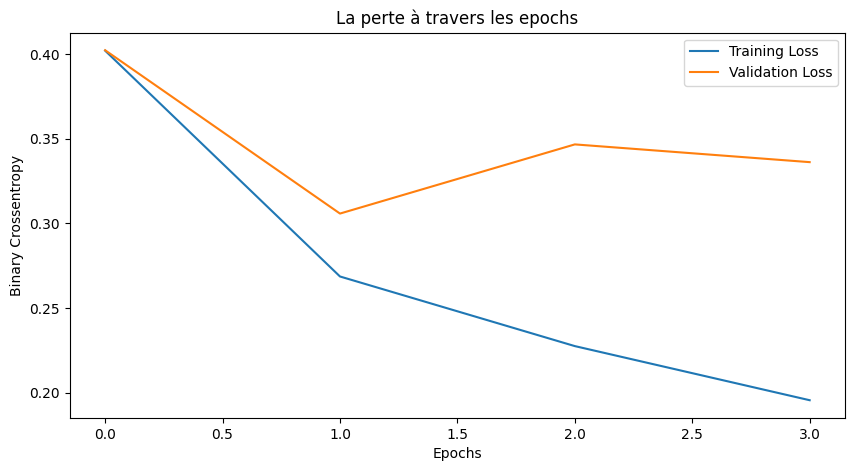

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('La perte à travers les epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

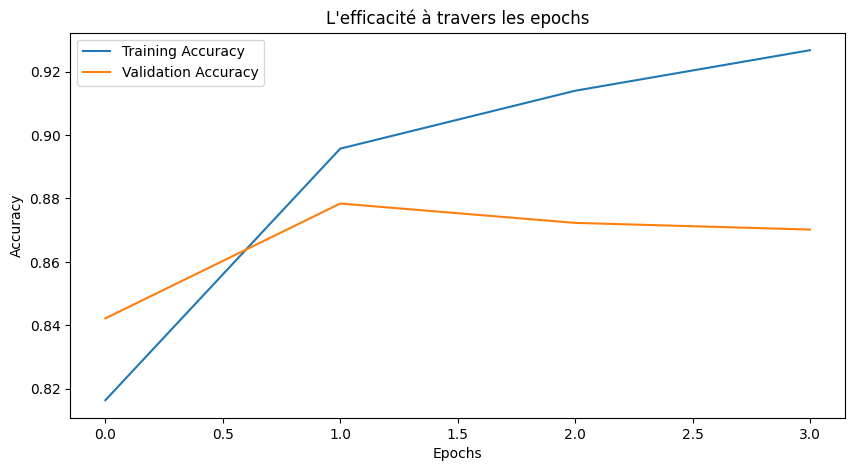

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title("L'efficacité à travers les epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
sentences =["i loved it! highly recommend it to anyone and everyone looking for a great movie to watch.",
            "this was awful! i hated it so much, nobody should watch this. the acting was terrible, the music was terrible, overall it was just bad.",
            "I thought this was a wonderful way to spend time"]

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=sequence_length, padding='post', truncating='post')
print (model.predict(padded))


1/1 [==============================] - 2s 2s/step
[[0.96332234]
 [0.00362992]
 [0.825874  ]]


# Essayer avec mes propres phrases en anglais ( car le jeu de données est en anglais )

In [ ]:
sentences2 =["it was not bad.",
            "this was amazing.",
            "I didn't like the actor but i loved the story"]

sequences2 = tokenizer.texts_to_sequences(sentences2)

padded = pad_sequences(sequences2, maxlen=sequence_length, padding='post', truncating='post')
print (model.predict(padded))

1/1 [==============================] - 0s 75ms/step
[[0.25211746]
 [0.8374591 ]
 [0.52002   ]]
